In [28]:
%pip install pandas
%pip install numpy
%pip install nltk
%pip install scikit-learn
%pip install re
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# notebook configurations
pd.options.display.max_colwidth = 1000

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\audre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\audre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\audre\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\audre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("suicide.csv")

In [3]:
df

,Tweet,Suicide
0,make lunch,Not Suicide post
1,alexia want money,Not Suicide post
2,dizzyhrvy crap take forever put together go go sleep day,Potential Suicide post
3,jnaylor kiwitweets hey jer since start twittering,Not Suicide post
4,try quot delicious library quot mixed result bar code think want add sport bra instead drill cool app tho,Not Suicide post
...,...,...
1782,forgotten much love nokia,Not Suicide post
1783,start day positive attitude great watch greatness,Not Suicide post
1784,hey give girl credit try,Not Suicide post
1785,drunken besties stumble room run around sober cj drunk hope knock door good time,Not Suicide post


In [4]:
df.head(5)

,Tweet,Suicide
0,make lunch,Not Suicide post
1,alexia want money,Not Suicide post
2,dizzyhrvy crap take forever put together go go sleep day,Potential Suicide post
3,jnaylor kiwitweets hey jer since start twittering,Not Suicide post
4,try quot delicious library quot mixed result bar code think want add sport bra instead drill cool app tho,Not Suicide post


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1787 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


## Preprocessing Data

## Drop empty rows

In our case the rows without a Tweet entry do not have a significant meaning, hence we may drop them.

In [6]:
df[df["Tweet"].isnull()]

,Tweet,Suicide
497,NaN,Potential Suicide post
1017,NaN,Not Suicide post


In [7]:
df.dropna()

,Tweet,Suicide
0,make lunch,Not Suicide post
1,alexia want money,Not Suicide post
2,dizzyhrvy crap take forever put together go go sleep day,Potential Suicide post
3,jnaylor kiwitweets hey jer since start twittering,Not Suicide post
4,try quot delicious library quot mixed result bar code think want add sport bra instead drill cool app tho,Not Suicide post
...,...,...
1782,forgotten much love nokia,Not Suicide post
1783,start day positive attitude great watch greatness,Not Suicide post
1784,hey give girl credit try,Not Suicide post
1785,drunken besties stumble room run around sober cj drunk hope knock door good time,Not Suicide post


### Remove punctuation

Removing punctuation in data cleaning is important for noise reduction, text standardization, tokenization, and improving language syntax. Punctuation marks usually do not carry significant meaning on their own and can introduce unnecessary noise in the text data. By removing punctuation, the text is standardized, making it easier for the model to process and analyze. Additionally, punctuation marks are typically treated as separate tokens during tokenization, and removing them helps create cleaner and more meaningful tokens.

In [8]:
df["Tweet"] = df["Tweet"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", " ", str(x)))
df

,Tweet,Suicide
0,make lunch,Not Suicide post
1,alexia want money,Not Suicide post
2,dizzyhrvy crap take forever put together go go sleep day,Potential Suicide post
3,jnaylor kiwitweets hey jer since start twittering,Not Suicide post
4,try quot delicious library quot mixed result bar code think want add sport bra instead drill cool app tho,Not Suicide post
...,...,...
1782,forgotten much love nokia,Not Suicide post
1783,start day positive attitude great watch greatness,Not Suicide post
1784,hey give girl credit try,Not Suicide post
1785,drunken besties stumble room run around sober cj drunk hope knock door good time,Not Suicide post


### Remove words with number

Removing words with numbers during data cleaning of product names eliminates numerical information that may not be relevant for the task at hand. Numerical values in product names often represent specific attributes, such as sizes or model numbers, which may not contribute to product understanding or classification. By removing these words, we focus on descriptive and discriminative features, simplifying the text representation for accurate predictions.


In [9]:
df["Tweet"] = df["Tweet"].apply(lambda x: ' '.join([word for word in x.split() if not re.search(r'\d', word)]))

In [10]:
df["Tweet"].head()

0                                                                                                   make lunch
1                                                                                            alexia want money
2                                                     dizzyhrvy crap take forever put together go go sleep day
3                                                            jnaylor kiwitweets hey jer since start twittering
4    try quot delicious library quot mixed result bar code think want add sport bra instead drill cool app tho
Name: Tweet, dtype: object

### Remove single string characters

Removing single-character strings during data cleaning is important as they often do not provide meaningful information and can introduce noise. By removing them, we can improve the quality of the text data and focus on more relevant words. This helps to reduce dimensionality, eliminate unnecessary noise, and improve the efficiency of subsequent text analysis tasks.

In [11]:
df["Tweet"] = df["Tweet"].str.replace(r'\b\w\b', "", regex = True)

### Lowercase

Lowercasing text during data cleaning in our project is important for standardization and consistency. It treats words with different cases as the same, reducing the vocabulary size and improving performance in subsequent tasks. Lowercasing ensures that words like ```Hello``` and ```hello``` are represented uniformly, making it easier to compare and analyze the text data.

In [12]:
df["Tweet"] = df["Tweet"].str.lower()

### Remove stop words

Stop words are commonly used words such as "a," "the," "is," which do not carry significant meaning and can introduce noise to the analysis. By removing stop words, we can reduce the dimensionality of the data and focus on more informative and content-rich words.

In [13]:
def remove_stop_words(input_string):
    # Tokenize the string
    tokens = word_tokenize(input_string)

    # Get the list of English stop words
    stop_words = set(stopwords.words("english"))

    # Remove stop words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Reconstruct the string
    output_string = " ".join(filtered_tokens)

    return output_string

In [14]:
# Apply to column "name"
df["Tweet"] = df["Tweet"].apply(remove_stop_words)

In [15]:
df.Tweet

0                                                                                                      make lunch
1                                                                                               alexia want money
2                                                        dizzyhrvy crap take forever put together go go sleep day
3                                                               jnaylor kiwitweets hey jer since start twittering
4       try quot delicious library quot mixed result bar code think want add sport bra instead drill cool app tho
                                                          ...                                                    
1782                                                                                    forgotten much love nokia
1783                                                            start day positive attitude great watch greatness
1784                                                                                    

### Part-of-Speech (POS) Tagging and Lemmatize the words

POS tagging identifies the grammatical category of each word, while lemmatization reduces words to their base form. By using POS tags, we accurately lemmatize words, ensuring consistent representation across different grammatical forms.

In [16]:
def get_wordnet_pos(tag):
    if tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("J"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [17]:
lemmatizer = WordNetLemmatizer()
sent = "kids smart watch for girls toy for kids gift for girls watches"

tagged_words = nltk.pos_tag(word_tokenize(sent))
for word, w_tag in tagged_words:
    lemma_tag = get_wordnet_pos(w_tag)
    lemma = lemmatizer.lemmatize(word, lemma_tag)
    print(f"{word} ({w_tag}) --> {lemma} ({lemma_tag})")

kids (NNS) --> kid (n)
smart (VBP) --> smart (v)
watch (NN) --> watch (n)
for (IN) --> for (n)
girls (NNS) --> girl (n)
toy (NN) --> toy (n)
for (IN) --> for (n)
kids (NNS) --> kid (n)
gift (NN) --> gift (n)
for (IN) --> for (n)
girls (NNS) --> girl (n)
watches (NNS) --> watch (n)


In [18]:
df["Tweet"] = df["Tweet"].apply(lambda x: " ".join([lemmatizer.lemmatize(word, pos = get_wordnet_pos(w_tag)) for word, w_tag in nltk.pos_tag(word_tokenize(x))]))

In [19]:
df_cleaned = df
df_cleaned.to_csv("suicide.csv", index = False)

## Run VADER

In [20]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.decomposition import PCA

vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\audre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
def sentiment_scores(text):
    return vader.polarity_scores(text)


df_cleaned['sentiment_scores'] = df_cleaned['Tweet'].apply(sentiment_scores)
df_cleaned['compound_scores'] = df_cleaned['sentiment_scores'].apply(lambda x: x['compound'])

df_cleaned.to_csv('sentiment_scores.csv', index=False)

scores = pd.read_csv("sentiment_scores.csv").drop('Suicide', axis = 1)

scores

,Tweet,sentiment_scores,compound_scores
0,make lunch,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
1,alexia want money,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.0772}",0.0772
2,dizzyhrvy crap take forever put together go go sleep day,"{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.3818}",-0.3818
3,jnaylor kiwitweets hey jer since start twittering,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
4,try quot delicious library quot mixed result bar code think want add sport bra instead drill cool app tho,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.743}",0.7430
...,...,...,...
1782,forgotten much love nokia,"{'neg': 0.235, 'neu': 0.247, 'pos': 0.519, 'compound': 0.5106}",0.5106
1783,start day positive attitude great watch greatness,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'compound': 0.8271}",0.8271
1784,hey give girl credit try,"{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.3818}",0.3818
1785,drunken besties stumble room run around sober cj drunk hope knock door good time,"{'neg': 0.125, 'neu': 0.573, 'pos': 0.302, 'compound': 0.5267}",0.5267


## Run PCA

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

compound_scores = scores['compound_scores']

# Standardize the data
scaler = StandardScaler()
compound_scores_scaled = scaler.fit_transform(compound_scores.values.reshape(-1, 1))

pca = PCA(n_components=1)  
pca_scores = pca.fit_transform(compound_scores_scaled)

pca_scores


array([[ 0.10667569],
       [-0.03382772],
       [ 0.8015488 ],
       ...,
       [-0.58819741],
       [-0.85191431],
       [-1.11217323]])

## K-Means

In [39]:
from sklearn.cluster import KMeans
arr = []

for i in range(1, 11):
    k_pca = KMeans(n_clusters=i, init= "k-means++", random_state= 99)
    k_pca.fit(pca_scores)
    arr.append(k_pca.inertia_)

arr

[1786.9999999999995,
 540.3776617764482,
 157.49243590739417,
 92.58262913726293,
 51.65211448540028,
 39.99150575776638,
 29.594273988250936,
 24.412035420808238,
 17.37494807303127,
 14.809539077554287]

Plotting so we can use the elbow method to look for how many clusters is optimal

Text(0.5, 0, 'Number of Clusters')

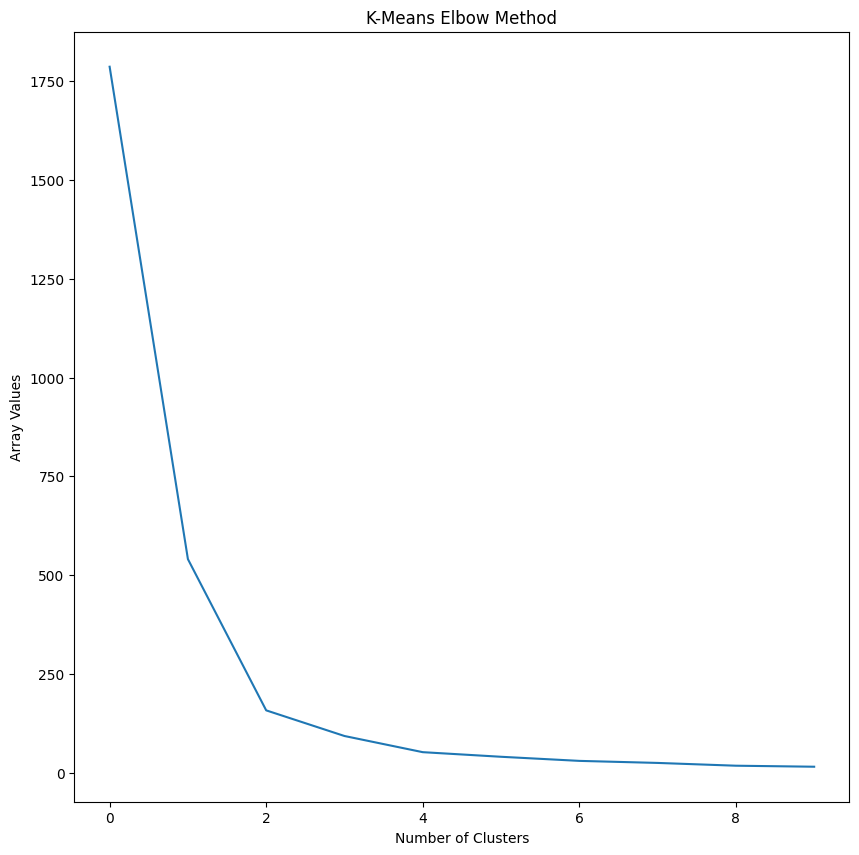

In [42]:
plt.figure(figsize= (10, 10))
plt.plot(arr)

plt.title("K-Means Elbow Method")
plt.ylabel("Array Values")
plt.xlabel("Number of Clusters")

Since the elbow showed up around the 2 cluster mark, we will be using 2 clusters

In [44]:
k_pca = KMeans(n_clusters= 2, init= "k-means++", random_state=99)
k_pca.fit(pca_scores)


KMeans(n_clusters=2, random_state=99)